In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques -w

In [1]:
import pandas as pd

In [3]:
housing_train = pd.read_csv('dataset/train.csv',index_col='Id')
housing_test = pd.read_csv('dataset/test.csv',index_col='Id')
housing_df_orig = housing_train.append(housing_test)

/home/shashank/Desktop/bootcamp/envs/machine_learning/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
housing_df_orig.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [9]:
housing_df_orig.columns.to_series().groupby(housing_df_orig.dtypes).groups

{dtype('int64'): Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch',
        'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
        'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold',
        'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
        'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
        'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
        'SalePrice', 'TotalBsmtSF'],
       dtype='object'),
 dtype('O'): Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
        'GarageFinish', 

In [10]:
ordered_cats = {
    'LandSlope':['Gtl','Mod','Sev'],
    'HouseStyle':['1Story','1.5Unf','1.5Fin','2Story','2.5Unf','2.5Fin','SFoyer','SLvl'],
    'GarageFinish':['NA','Unf','RFn','Fin'],
    'Functional':['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],
    'CentralAir':['N','Y'],
    'BsmtFinType1':['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    'BsmtFinType2':['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],
    'BsmtExposure':['NA','No','Mn','Av','Gd'],
    'LotShape':['IR3','IR2','IR1','Reg'],
    'Utilities':['ELO','NoSeWa','NoSeWr','AllPub'],
    'LandSlope':['Gtl','Mod','Sev'],
    'Fence':['NA','MnWw','GdWo','MnPrv','GdPrv']
    
}
ordered_qual = ['NA','Po','Fa','TA','Gd','Ex']
qual_cols = ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual', \
             'FireplaceQu','GarageQual','GarageCond','PoolQC']

ordered_cats.update({col:ordered_qual for col in qual_cols})

In [9]:
ordered_cats

{'LandSlope': ['Gtl', 'Mod', 'Sev'],
 'HouseStyle': ['1Story',
  '1.5Unf',
  '1.5Fin',
  '2Story',
  '2.5Unf',
  '2.5Fin',
  'SFoyer',
  'SLvl'],
 'GarageFinish': ['NA', 'Unf', 'RFn', 'Fin'],
 'Functional': ['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
 'CentralAir': ['N', 'Y'],
 'BsmtFinType1': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtFinType2': ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
 'BsmtExposure': ['NA', 'No', 'Mn', 'Av', 'Gd'],
 'LotShape': ['IR3', 'IR2', 'IR1', 'Reg'],
 'Utilities': ['ELO', 'NoSeWa', 'NoSeWr', 'AllPub'],
 'Fence': ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'],
 'ExterQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'ExterCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'BsmtCond': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'HeatingQC': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'KitchenQual': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'FireplaceQu': ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
 'Garag

In [11]:
def any_nan(df):
    return [k for k,v in df.isna().any().to_dict().items() if v]
any_nan(housing_df_orig)

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'KitchenQual',
 'LotFrontage',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SalePrice',
 'SaleType',
 'TotalBsmtSF',
 'Utilities']

In [14]:
to_order_repl = {col_name:cats[0] for col_name,cats in ordered_cats.items()}

In [15]:
def fill_na_basic(df,ordered=False,min_order=0,str_def='UNKNOWN',num_def=0):
    
    if ordered:
        to_order_repl = {col_name:cats[0] for col_name,cats in ordered_cats.items()}
        df = df.fillna(to_order_repl)
        
    str_replace_cols = df.select_dtypes(['O','category'])
    to_str_repl = {col_name:str_def for col_name in str_replace_cols}
    df = df.fillna(to_str_repl)
    
    return df.fillna(num_def)

In [17]:
housing_df_nona = fill_na_basic(housing_df_orig,ordered_cats)

In [0]:
housing_df_nona

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,UNKNOWN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,UNKNOWN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,UNKNOWN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,UNKNOWN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,UNKNOWN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
6,796,566,320,UNKNOWN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
7,1694,0,0,UNKNOWN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
8,1107,983,0,UNKNOWN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
9,1022,752,0,UNKNOWN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008


In [18]:
def factorize_df(df,ordered=False):
    factorize_index = {}
    
    if ordered:
        for col_name in ordered:
            if col_name in df:
                mapping_dict = {obj:i for i,obj in enumerate(ordered[col_name])}
                df[col_name] = df[col_name].map(mapping_dict)
                factorize_index[col_name] = mapping_dict
            else:
                raise KeyError('The column named '+col_name+' passed is not present in the dataframe'+ \
                               'with columns '+str(df.columns))
                               
    to_fact = df.select_dtypes(['O','category'])
    for key in to_fact:
        df[key],fact_index = pd.factorize(df[key])
        factorize_index[key] = fact_index
                               
    return df,factorize_index

In [19]:
housing_df_fact,fact_idx= factorize_df(housing_df_nona,ordered_cats)

In [0]:
housing_df_fact

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,0,3,0,3,1,706.0,0.0,...,0,0,0,8,856.0,3,0,2003,2003,2008
2,1262,0,0,0,3,0,3,4,978.0,0.0,...,0,0,0,6,1262.0,3,298,1976,1976,2007
3,920,866,0,0,3,0,3,2,486.0,0.0,...,0,0,0,6,920.0,3,0,2001,2002,2008
4,961,756,0,0,3,0,4,1,216.0,0.0,...,0,0,0,7,756.0,3,0,1915,1970,2006
5,1145,1053,0,0,4,0,3,3,655.0,0.0,...,0,0,0,9,1145.0,3,192,2000,2000,2008
6,796,566,320,0,1,0,3,1,732.0,0.0,...,0,0,0,5,796.0,3,40,1993,1995,2009
7,1694,0,0,0,3,0,3,3,1369.0,0.0,...,0,0,0,7,1686.0,3,255,2004,2005,2007
8,1107,983,0,0,3,0,3,2,859.0,32.0,...,0,0,0,7,1107.0,3,235,1973,1973,2009
9,1022,752,0,0,2,0,3,1,0.0,0.0,...,0,0,0,8,952.0,3,90,1931,1950,2008


In [21]:
any_nan(housing_df_fact)

[]

In [0]:
fact_idx

{'LandSlope': {'Gtl': 0, 'Mod': 1, 'Sev': 2},
 'HouseStyle': {'1Story': 0,
  '1.5Unf': 1,
  '1.5Fin': 2,
  '2Story': 3,
  '2.5Unf': 4,
  '2.5Fin': 5,
  'SFoyer': 6,
  'SLvl': 7},
 'GarageFinish': {'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
 'Functional': {'Sal': 0,
  'Sev': 1,
  'Maj2': 2,
  'Maj1': 3,
  'Mod': 4,
  'Min2': 5,
  'Min1': 6,
  'Typ': 7},
 'CentralAir': {'N': 0, 'Y': 1},
 'BsmtFinType1': {'NA': 0,
  'Unf': 1,
  'LwQ': 2,
  'Rec': 3,
  'BLQ': 4,
  'ALQ': 5,
  'GLQ': 6},
 'BsmtFinType2': {'NA': 0,
  'Unf': 1,
  'LwQ': 2,
  'Rec': 3,
  'BLQ': 4,
  'ALQ': 5,
  'GLQ': 6},
 'BsmtExposure': {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
 'LotShape': {'IR3': 0, 'IR2': 1, 'IR1': 2, 'Reg': 3},
 'Utilities': {'ELO': 0, 'NoSeWa': 1, 'NoSeWr': 2, 'AllPub': 3},
 'Fence': {'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
 'ExterQual': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'ExterCond': {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
 'BsmtQual': {'NA': 0, '

In [22]:
housing_df_fact['SalePrice']

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
6       143000.0
7       307000.0
8       200000.0
9       129900.0
10      118000.0
11      129500.0
12      345000.0
13      144000.0
14      279500.0
15      157000.0
16      132000.0
17      149000.0
18       90000.0
19      159000.0
20      139000.0
21      325300.0
22      139400.0
23      230000.0
24      129900.0
25      154000.0
26      256300.0
27      134800.0
28      306000.0
29      207500.0
30       68500.0
          ...   
2890         0.0
2891         0.0
2892         0.0
2893         0.0
2894         0.0
2895         0.0
2896         0.0
2897         0.0
2898         0.0
2899         0.0
2900         0.0
2901         0.0
2902         0.0
2903         0.0
2904         0.0
2905         0.0
2906         0.0
2907         0.0
2908         0.0
2909         0.0
2910         0.0
2911         0.0
2912         0.0
2913         0.0
2914         0.0
2915         0.0
2916         0.0
2917       

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.linear_model import LinearRegression as lr

In [25]:
lr_model = lr(n_jobs=-1)

In [26]:
Y_net = housing_df_fact['SalePrice']
X_net = housing_df_fact.loc[:,housing_df_fact.columns != 'SalePrice']

In [27]:
X_train, X_test = X_net[:len(housing_train)], X_net[len(housing_train):]
Y_train = Y_net[:len(housing_train)]

In [28]:
lr_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [29]:
lr_model.coef_

array([ 2.09851332e+01,  1.68429940e+01,  1.72622701e+01, -2.67404739e+03,
       -7.16589582e+03, -3.28909094e+03, -7.77020179e+03,  6.23758703e+03,
        2.67763498e-02,  6.37787003e+00,  1.56111355e+03, -1.32240633e+03,
        5.78979616e+03,  2.22655159e+03,  8.20901333e+03, -3.83499396e+00,
        2.49866628e+02, -1.97948286e+03, -9.07886957e+03,  2.77769949e+03,
       -1.99737614e+00, -2.49263484e+03,  1.11133602e+04, -4.50077625e+02,
        6.69125227e+02, -3.81882643e+02,  4.45031752e+02,  2.56419669e+03,
        3.14159580e+02,  5.30236118e+03,  5.03513924e+03,  9.68911823e+00,
        1.08088677e+04, -6.46365329e+03,  4.71215064e+02,  1.25051079e+04,
        1.09502102e+03, -1.80626540e+01,  3.21110626e+01,  2.16780730e+03,
       -9.76227452e+02,  1.05353609e+03, -2.12137234e+03, -1.34891668e+04,
        8.55724348e+03,  1.01027691e+03,  2.86707442e+03,  3.32809691e-01,
        1.78716473e+03,  8.20162792e+00, -3.62383312e+02, -5.71706457e+00,
       -7.41185322e+01,  

In [30]:
Y_pred = lr_model.predict(X_test)

In [32]:
Y_pred

array([112614.76853358, 180352.43769608, 164617.87634514, ...,
       162329.71992828, 115429.82802823, 239988.04549079])

/home/shashank/Desktop/bootcamp/envs/machine_learning/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


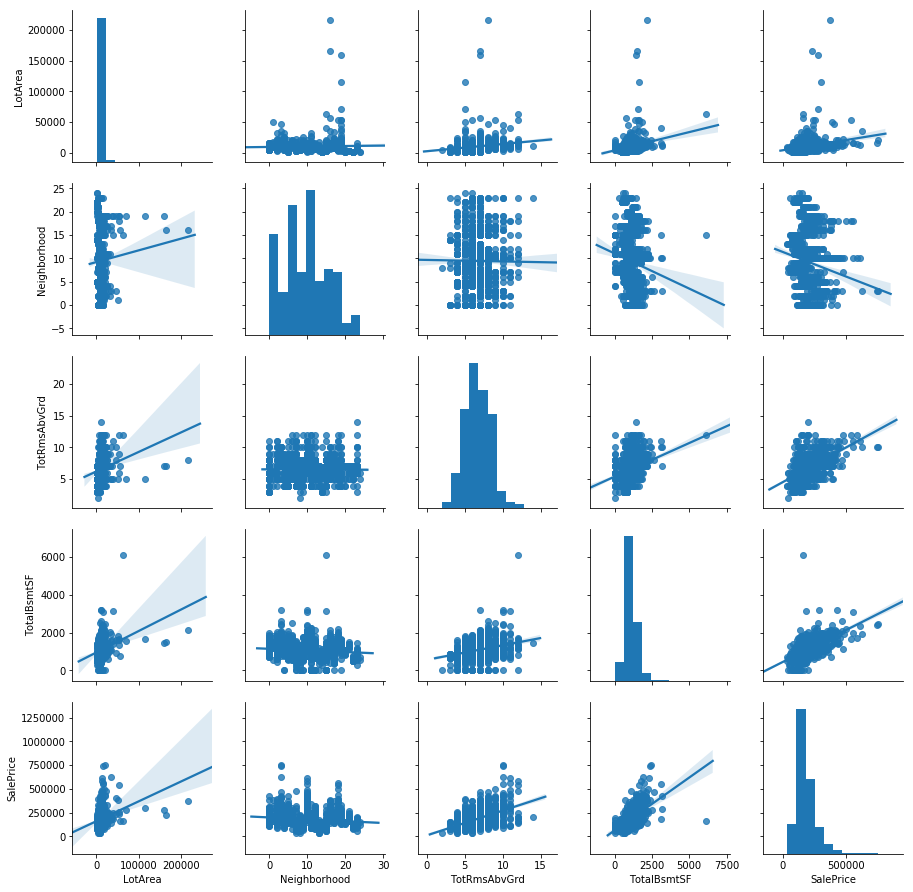

In [38]:
sns.pairplot(data=housing_df_nona[:len(housing_train)],
             vars=['LotArea','Neighborhood','TotRmsAbvGrd','TotalBsmtSF','SalePrice'],kind='reg')

In [40]:
housing_df_nona

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,0,3,0,3,1,706.0,0.0,...,0,0,0,8,856.0,3,0,2003,2003,2008
2,1262,0,0,0,3,0,3,4,978.0,0.0,...,0,0,0,6,1262.0,3,298,1976,1976,2007
3,920,866,0,0,3,0,3,2,486.0,0.0,...,0,0,0,6,920.0,3,0,2001,2002,2008
4,961,756,0,0,3,0,4,1,216.0,0.0,...,0,0,0,7,756.0,3,0,1915,1970,2006
5,1145,1053,0,0,4,0,3,3,655.0,0.0,...,0,0,0,9,1145.0,3,192,2000,2000,2008
6,796,566,320,0,1,0,3,1,732.0,0.0,...,0,0,0,5,796.0,3,40,1993,1995,2009
7,1694,0,0,0,3,0,3,3,1369.0,0.0,...,0,0,0,7,1686.0,3,255,2004,2005,2007
8,1107,983,0,0,3,0,3,2,859.0,32.0,...,0,0,0,7,1107.0,3,235,1973,1973,2009
9,1022,752,0,0,2,0,3,1,0.0,0.0,...,0,0,0,8,952.0,3,90,1931,1950,2008
